<font size="6">**India's COVID-19 and its analysis statewise**</font><br>

<br>

<font size="5">**CONTENTS**</font><br>
<br>1.Business view
<br>2.Data preparation and understanding
<br>3.Question/answer
<br>4.Licensing, Authors, Acknowledgements

<br>

<br>

<font size="5">**1.Business View**</font><br>
<br>
**Pose atleast three questions related to business or real-world applications of how the data could be used**<br>
<br>
The following are the 5 questions are:-<br>
1.In which state the chance of getting infected with covid19 is high?<br>
2.In which state chances of getting cured is high ?<br>
3.In which state the fatality rate is high?<br>
4.Which state has tested the maximum sample and which state has tested mimimum sample ?<br>
5.Discuss about the posive case and negative cases in the state odisha ?<br>

<br>

<font size="5">**2.Data preparation and understanding**</font><br>
<br>
We will be doing Analysing, Modeling and Visualizing for " COVID-19 dataset" which has been taken from Kaggle

<br>

In [195]:
import pandas as pd
df_cc=pd.read_csv('confcovid_19_india.csv')
df_st=pd.read_csv('StatewiseTestingDetails.csv')

In [196]:
print(df_cc.duplicated().sum())

0


In [197]:
print(df_st.duplicated().sum())

2


In [198]:
print(df_cc.isnull().sum())

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64


In [199]:
print(df_st.isnull().sum())

Date              0
State             0
TotalSamples      0
Negative        198
Positive          8
dtype: int64


In [200]:
print(df_cc.dtypes)

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object


In [201]:
print(df_st.dtypes)

Date             object
State            object
TotalSamples    float64
Negative        float64
Positive        float64
dtype: object


In [202]:
print(df_st.nunique())

Date             46
State            35
TotalSamples    980
Negative        802
Positive        587
dtype: int64


In [203]:
print(df_cc.nunique())

Sno                         1935
Date                         106
Time                           7
State/UnionTerritory          37
ConfirmedIndianNational       62
ConfirmedForeignNational      12
Cured                        398
Deaths                       163
Confirmed                    675
dtype: int64


In [204]:
print(df_cc.head(1).columns)
print(df_st.head(1).columns)

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')
Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')


In [205]:
df_cc.rename(columns=lambda x:x.strip().lower().replace("/","_"),inplace=True)
df_cc.head(1)

sno      date     time state_unionterritory confirmedindiannational  \
0    1  30/01/20  6:00 PM               Kerala                       1   

  confirmedforeignnational  cured  deaths  confirmed  
0                        0      0       0          1

In [206]:
df_st.rename(columns=lambda x:x.strip().lower().replace(" ","_"),inplace=True)
df_st.head(1)

date                        state  totalsamples  negative  positive
0  2020-04-17  Andaman and Nicobar Islands        1403.0    1210.0      12.0

In [207]:
df_cc.dropna(inplace=True)
df_st.dropna(inplace=True)

In [208]:
df_cc.isnull().sum().any()
df_st.isnull().sum().any()

False

<font size="5">**3.Question/answer**</font><br>
<br>As per the questions discussed above we will be solving them.

<br>

In [96]:
import pandas as pd
df_cc=pd.read_csv('confcovid_19_india.csv')
df_st=pd.read_csv('StatewiseTestingDetails.csv')

In [97]:
df_cc.style

In [98]:
df_st.style

<br>

<br>

**<font size="3">1.In which state the chance of getting infected with covid19 is high?**<br>

<br>

In [99]:
 df_st.loc[df_st['State']  =='Assam', 'TotalSamples'].sum()

198001.0

In [100]:
total=df_st.groupby('State')['TotalSamples'].sum()
print(total)

State
Andaman and Nicobar Islands                   10684.0
Andhra Pradesh                              2763870.0
Arunachal Pradesh                             23419.0
Assam                                        198001.0
Bihar                                        675164.0
Chandigarh                                    35968.0
Chhattisgarh                                 370791.0
Dadra and Nagar Haveli and Daman and Diu        421.0
Delhi                                       1518043.0
Goa                                           55298.0
Gujarat                                     1992516.0
Haryana                                      915594.0
Himachal Pradesh                             185937.0
Jammu and Kashmir                            698396.0
Jharkhand                                    319846.0
Karnataka                                   1810733.0
Kerala                                       969823.0
Ladakh                                        26560.0
Madhya Pradesh        

In [101]:
df_st["Negative"] = df_st["Negative"].fillna(0)

In [102]:
df_st.style

In [66]:
total_negative=df_st.groupby('State')['Negative'].sum()
print(total_negative)

State
Andaman and Nicobar Islands                    1210.0
Andhra Pradesh                              2703310.0
Arunachal Pradesh                             19565.0
Assam                                        183404.0
Bihar                                          4598.0
Chandigarh                                    32833.0
Chhattisgarh                                 346940.0
Dadra and Nagar Haveli and Daman and Diu        421.0
Delhi                                        443105.0
Goa                                             197.0
Gujarat                                     1854097.0
Haryana                                      812334.0
Himachal Pradesh                             180660.0
Jammu and Kashmir                            679839.0
Jharkhand                                    317104.0
Karnataka                                   1697696.0
Kerala                                       931561.0
Ladakh                                        19360.0
Madhya Pradesh        

In [103]:
ratio=total_negative/total
print(ratio)

State
Andaman and Nicobar Islands                 0.113253
Andhra Pradesh                              0.978089
Arunachal Pradesh                           0.835433
Assam                                       0.926278
Bihar                                       0.006810
Chandigarh                                  0.912839
Chhattisgarh                                0.935675
Dadra and Nagar Haveli and Daman and Diu    1.000000
Delhi                                       0.291892
Goa                                         0.003563
Gujarat                                     0.930531
Haryana                                     0.887221
Himachal Pradesh                            0.971619
Jammu and Kashmir                           0.973429
Jharkhand                                   0.991427
Karnataka                                   0.937574
Kerala                                      0.960547
Ladakh                                      0.728916
Madhya Pradesh                          

Text(0, 0.5, 'Ratio')

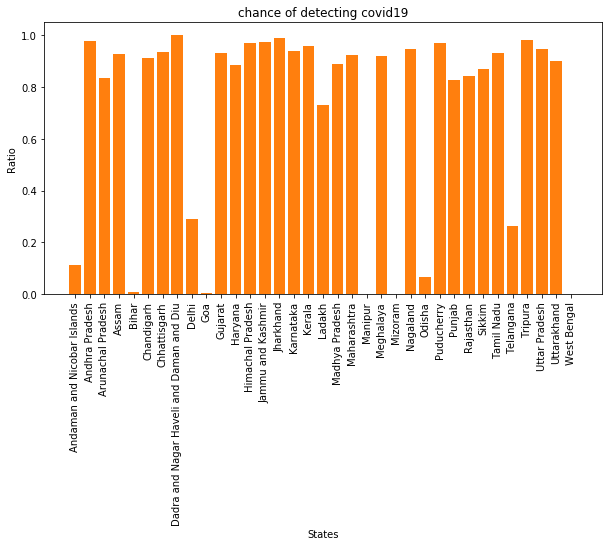

In [104]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
plt.bar(ratio.index,ratio)
plt.bar(ratio.index,ratio)
plt.title('chance of detecting covid19')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.ylabel('Ratio')

In [105]:
ratio.idxmax(axis=1)

'Dadra and Nagar Haveli and Daman and Diu'

<br>

<br>

<font size="3">**2.In which state chances of getting cured is high ?**<br>

<br>

In [106]:
import pandas as pd
df_cc=pd.read_csv('confcovid_19_india.csv')
df_cc.style

In [107]:
df_cc.rename(columns={"State/UnionTerritory":"State"},inplace=True)
df_cc.head(1)

Sno      Date     Time   State ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM  Kerala                       1   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1

In [110]:
 df_cc.loc[df_cc['State']  =='Assam', 'Confirmed'].sum()

1652

In [112]:
total_confirmed=df_cc.groupby('State')['Confirmed'].sum()
print(total_confirmed)

State
Andaman and Nicobar Islands       983
Andhra Pradesh                  43535
Arunachal Pradesh                  42
Assam                            1652
Bihar                           12039
Chandigarh                       2650
Chhattisgarh                     1596
Dadar Nagar Haveli                  9
Delhi                          127264
Goa                               327
Gujarat                        136404
Haryana                         14363
Himachal Pradesh                 1564
Jammu and Kashmir               19852
Jharkhand                        2892
Jharkhand#                         45
Karnataka                       20311
Kerala                          20373
Ladakh                           1247
Madhya Pradesh                  78622
Maharashtra                    356069
Manipur                            94
Meghalaya                         349
Mizoram                            51
Nagaland                            2
Nagaland#                           0
Odisha

In [113]:
total_cured=df_cc.groupby('State')['Cured'].sum()
print(total_cured)

State
Andaman and Nicobar Islands      619
Andhra Pradesh                 12664
Arunachal Pradesh                 24
Assam                            741
Bihar                           4056
Chandigarh                       571
Chhattisgarh                    1107
Dadar Nagar Haveli                 0
Delhi                          33989
Goa                              220
Gujarat                        28939
Haryana                         6384
Himachal Pradesh                 860
Jammu and Kashmir               6305
Jharkhand                        772
Jharkhand#                         0
Karnataka                       7582
Kerala                         12502
Ladakh                           603
Madhya Pradesh                 20402
Maharashtra                    60450
Manipur                           61
Meghalaya                        100
Mizoram                            5
Nagaland                           0
Nagaland#                          0
Odisha                          

In [114]:
ratio_cured=total_cured/total_confirmed
print(ratio_cured)

State
Andaman and Nicobar Islands    0.629705
Andhra Pradesh                 0.290892
Arunachal Pradesh              0.571429
Assam                          0.448547
Bihar                          0.336905
Chandigarh                     0.215472
Chhattisgarh                   0.693609
Dadar Nagar Haveli             0.000000
Delhi                          0.267075
Goa                            0.672783
Gujarat                        0.212157
Haryana                        0.444475
Himachal Pradesh               0.549872
Jammu and Kashmir              0.317600
Jharkhand                      0.266943
Jharkhand#                     0.000000
Karnataka                      0.373295
Kerala                         0.613655
Ladakh                         0.483561
Madhya Pradesh                 0.259495
Maharashtra                    0.169770
Manipur                        0.648936
Meghalaya                      0.286533
Mizoram                        0.098039
Nagaland                       0.0

Text(0, 0.5, 'Ratio Cured')

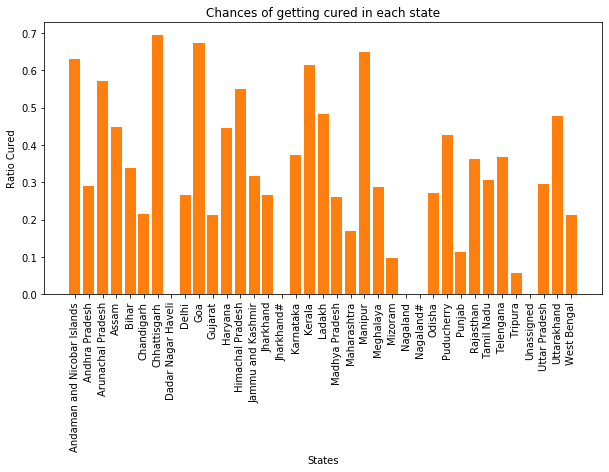

In [115]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
plt.bar(ratio_cured.index,ratio_cured)
plt.bar(ratio_cured.index,ratio_cured)
plt.title('Chances of getting cured in each state')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.ylabel('Ratio Cured')

In [116]:
ratio_cured.idxmax(axis=1)

'Chhattisgarh'

<br>

<br>

<font size="3">**3.In which state the fatality rate is high?**<br>


<br>

In [119]:
total_death=df_cc.groupby('State')['Deaths'].sum()
print(total_death)

State
Andaman and Nicobar Islands        0
Andhra Pradesh                   976
Arunachal Pradesh                  0
Assam                             39
Bihar                            118
Chandigarh                        17
Chhattisgarh                       0
Dadar Nagar Haveli                 0
Delhi                           1907
Goa                                0
Gujarat                         7391
Haryana                          174
Himachal Pradesh                  61
Jammu and Kashmir                258
Jharkhand                         87
Jharkhand#                         3
Karnataka                        757
Kerala                           143
Ladakh                             0
Madhya Pradesh                  4267
Maharashtra                    15067
Manipur                            0
Meghalaya                         30
Mizoram                            0
Nagaland                           0
Nagaland#                          0
Odisha                          

In [120]:
total_cured=df_cc.groupby('State')['Cured'].sum()
print(total_cured)

State
Andaman and Nicobar Islands      619
Andhra Pradesh                 12664
Arunachal Pradesh                 24
Assam                            741
Bihar                           4056
Chandigarh                       571
Chhattisgarh                    1107
Dadar Nagar Haveli                 0
Delhi                          33989
Goa                              220
Gujarat                        28939
Haryana                         6384
Himachal Pradesh                 860
Jammu and Kashmir               6305
Jharkhand                        772
Jharkhand#                         0
Karnataka                       7582
Kerala                         12502
Ladakh                           603
Madhya Pradesh                 20402
Maharashtra                    60450
Manipur                           61
Meghalaya                        100
Mizoram                            5
Nagaland                           0
Nagaland#                          0
Odisha                          

In [121]:
fatality_ratio=total_death/total_cured
print(fatality_ratio)

State
Andaman and Nicobar Islands    0.000000
Andhra Pradesh                 0.077069
Arunachal Pradesh              0.000000
Assam                          0.052632
Bihar                          0.029093
Chandigarh                     0.029772
Chhattisgarh                   0.000000
Dadar Nagar Haveli                  NaN
Delhi                          0.056106
Goa                            0.000000
Gujarat                        0.255399
Haryana                        0.027256
Himachal Pradesh               0.070930
Jammu and Kashmir              0.040920
Jharkhand                      0.112694
Jharkhand#                          inf
Karnataka                      0.099842
Kerala                         0.011438
Ladakh                         0.000000
Madhya Pradesh                 0.209146
Maharashtra                    0.249247
Manipur                        0.000000
Meghalaya                      0.300000
Mizoram                        0.000000
Nagaland                          

In [136]:
import numpy as np
fr=fatality_ratio.replace([np.inf, -np.inf], np.nan)

In [137]:
fr.dropna()

State
Andaman and Nicobar Islands    0.000000
Andhra Pradesh                 0.077069
Arunachal Pradesh              0.000000
Assam                          0.052632
Bihar                          0.029093
Chandigarh                     0.029772
Chhattisgarh                   0.000000
Delhi                          0.056106
Goa                            0.000000
Gujarat                        0.255399
Haryana                        0.027256
Himachal Pradesh               0.070930
Jammu and Kashmir              0.040920
Jharkhand                      0.112694
Karnataka                      0.099842
Kerala                         0.011438
Ladakh                         0.000000
Madhya Pradesh                 0.209146
Maharashtra                    0.249247
Manipur                        0.000000
Meghalaya                      0.300000
Mizoram                        0.000000
Odisha                         0.033201
Puducherry                     0.013889
Punjab                         0.2

Text(0, 0.5, 'Fatality Ratio')

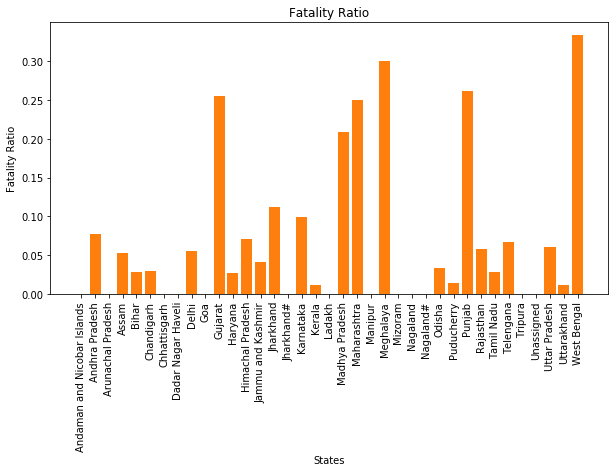

In [138]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
plt.bar(fatality_ratio.index,fatality_ratio)
plt.bar(fatality_ratio.index,fatality_ratio)
plt.title('Fatality Ratio')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.ylabel('Fatality Ratio')

In [140]:
fr.idxmax(axis=1)

'West Bengal'

<font size="3">**4.Which state has tested the maximum sample and which state has tested mimimum sample ?**<br>

<br>

In [141]:
import pandas as pd
df_st=pd.read_csv('StatewiseTestingDetails.csv')
df_st.style

In [143]:
mean_sample=df_st.groupby('State')['TotalSamples'].mean()
print(mean_sample)

State
Andaman and Nicobar Islands                   2671.000000
Andhra Pradesh                               78967.714286
Arunachal Pradesh                              936.760000
Assam                                         8250.041667
Bihar                                        17767.473684
Chandigarh                                     999.111111
Chhattisgarh                                 12359.700000
Dadra and Nagar Haveli and Daman and Diu       140.333333
Delhi                                        43372.657143
Goa                                           1843.266667
Gujarat                                      56929.028571
Haryana                                      24094.578947
Himachal Pradesh                              5468.735294
Jammu and Kashmir                            19954.171429
Jharkhand                                    10317.612903
Karnataka                                    47650.868421
Kerala                                       22041.431818
Ladakh  

In [145]:
mean_sample.idxmax(axis=1)

'Maharashtra'

In [146]:
mean_sample.idxmin(axis=1)

'Dadra and Nagar Haveli and Daman and Diu'

In [148]:
difference=mean_sample.max()-mean_sample.min()
print(difference)

105654.88288288288


<font size="3">**5.Discuss about the posive case and negative cases in the state odisha ?**<br>

In [166]:
import pandas as pd
df_st=pd.read_csv('StatewiseTestingDetails.csv')
df_st.style

In [171]:
odisha=df_st.loc[df_st['State'] == 'Odisha']
print(odisha)

           Date   State  TotalSamples  Negative  Positive
702  2020-04-03  Odisha        1395.0    1108.0      20.0
703  2020-04-07  Odisha        2190.0       0.0      40.0
704  2020-04-07  Odisha        2441.0       0.0      42.0
705  2020-04-08  Odisha        2441.0    2399.0      42.0
706  2020-04-09  Odisha        3249.0    3201.0      48.0
707  2020-04-10  Odisha        3547.0    3497.0      50.0
708  2020-04-11  Odisha        3551.0    3497.0      51.0
709  2020-04-12  Odisha        3862.0    3808.0      54.0
710  2020-04-13  Odisha        4170.0    4116.0      54.0
711  2020-04-14  Odisha        4734.0    4678.0      56.0
712  2020-04-15  Odisha        5537.0    5477.0      60.0
713  2020-04-16  Odisha        6734.0    6674.0      60.0
714  2020-04-17  Odisha        7577.0    7517.0      60.0
715  2020-04-18  Odisha        8619.0    8559.0      60.0
716  2020-04-19  Odisha        9690.0    9629.0      61.0
717  2020-04-20  Odisha       10641.0       0.0      68.0
718  2020-04-2

In [ ]:
odisha["Negative"] = odisha["Negative"].fillna(0)

In [175]:
print(odisha.head(1).columns)

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')


In [ ]:
odisha.drop(['Date', 'State', 'TotalSamples'],axis=1,inplace=True)

In [177]:
print(odisha.head(1).columns)

Index(['Negative', 'Positive'], dtype='object')


In [178]:
print(odisha)

     Negative  Positive
702    1108.0      20.0
703       0.0      40.0
704       0.0      42.0
705    2399.0      42.0
706    3201.0      48.0
707    3497.0      50.0
708    3497.0      51.0
709    3808.0      54.0
710    4116.0      54.0
711    4678.0      56.0
712    5477.0      60.0
713    6674.0      60.0
714    7517.0      60.0
715    8559.0      60.0
716    9629.0      61.0
717       0.0      68.0
718       0.0      79.0
719       0.0      83.0
720       0.0      89.0
721       0.0      94.0
722       0.0      94.0
723       0.0     103.0
724       0.0     111.0
725       0.0     118.0
726       0.0     122.0
727       0.0     142.0
728       0.0     149.0
729       0.0     157.0
730       0.0     162.0
731       0.0     169.0
732       0.0     170.0
733       0.0     185.0
734       0.0     209.0
735       0.0     271.0
736       0.0     294.0
737       0.0     362.0
738       0.0     414.0
739       0.0     437.0
740       0.0     538.0


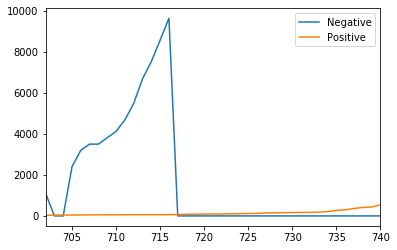

In [193]:
odisha.plot(y=['Negative', 'Positive'])

<br>

<font size="5"><br>**4.Licensing, Authors, Acknowledgements**</font><br>
<br>For this project I was interested in contributing to the socity through my knowledge by helping the society fight through the recent pandemic COVID-19.<br>
Must give credit to Stack Overflow for clearing the doubts. You can find the Licensing for the dataset at Kaggle .<br>
And a big thanks to udacity for helping me out and teaching me about this domain<br> 

<br>

<br>

<br>